In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import SMOTE

from scipy.stats import f_oneway, ttest_rel
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, recall_score
# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization
from tensorflow.keras.metrics import Recall

from pytorch_tabnet.tab_model import TabNetClassifier

In [48]:
# load data
df = pd.read_csv('data/combined.csv')
X = df.drop('depression', axis=1)
y = df['depression']

# select 20 most important features
f_values, p_values = f_classif(X, y)


f_test = pd.DataFrame({
    'Feature': X.columns,
    'F-value': f_values,
    'p-value': p_values
})

f_test = f_test.sort_values(by='F-value', ascending=False)

x = X[f_test['Feature'][:20]]



In [49]:
# normalize data
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# SMOTE
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

Logistic Regression
ROC AUC:  0.6996908442330559
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       841
           1       0.22      0.68      0.34       100

    accuracy                           0.72       941
   macro avg       0.59      0.70      0.58       941
weighted avg       0.87      0.72      0.77       941


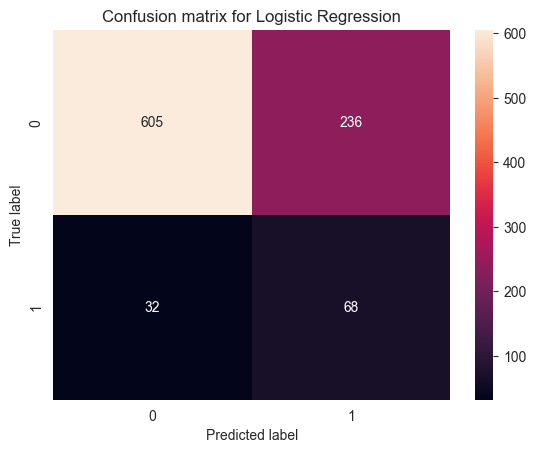

In [50]:
# logistic regression
model1 = LogisticRegression(max_iter=1000)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print('Logistic Regression')
print('ROC AUC: ', roc_auc_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

# confusion matrix
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for Logistic Regression')
plt.show()




SVM
ROC AUC:  0.6700416171224731
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       841
           1       0.21      0.61      0.31       100

    accuracy                           0.72       941
   macro avg       0.58      0.67      0.57       941
weighted avg       0.86      0.72      0.77       941


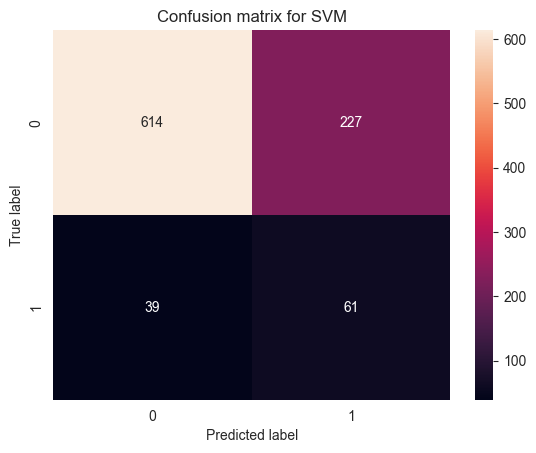

In [51]:
# SVM
model2 = SVC(kernel='poly',degree=4,C=.1)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print('SVM')
print('ROC AUC: ', roc_auc_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

# confusion matrix
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for SVM')
plt.show()

Random Forest
ROC AUC:  0.6600891795481569
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       841
           1       0.27      0.47      0.34       100

    accuracy                           0.81       941
   macro avg       0.60      0.66      0.62       941
weighted avg       0.86      0.81      0.83       941


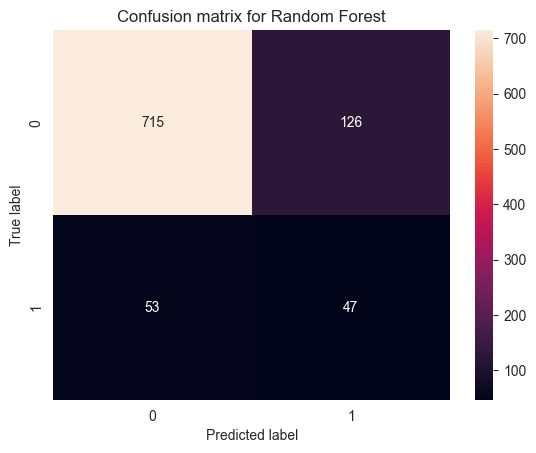

In [52]:
# random forest
model3 = RandomForestClassifier(n_estimators=1000, max_depth=5)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print('Random Forest')
print('ROC AUC: ', roc_auc_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

# confusion matrix
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for Random Forest')
plt.show()

XGBoost
ROC AUC:  0.5581093935790725
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       841
           1       0.41      0.14      0.21       100

    accuracy                           0.89       941
   macro avg       0.66      0.56      0.57       941
weighted avg       0.85      0.89      0.86       941


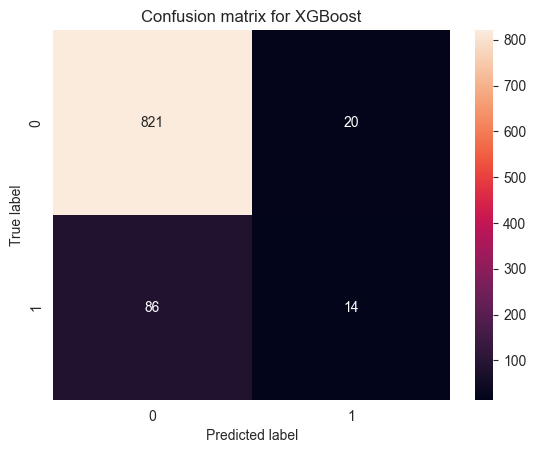

In [53]:
# XGBoost
model4 = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000, max_depth=10)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
print('XGBoost')
print('ROC AUC: ', roc_auc_score(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

# confusion matrix
cm = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for XGBoost')
plt.show()


30/30 [==============================] - 0s 1ms/step
Deep Learning
ROC AUC:  0.6130321046373365
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       841
           1       0.29      0.32      0.30       100

    accuracy                           0.84       941
   macro avg       0.60      0.61      0.61       941
weighted avg       0.85      0.84      0.85       941


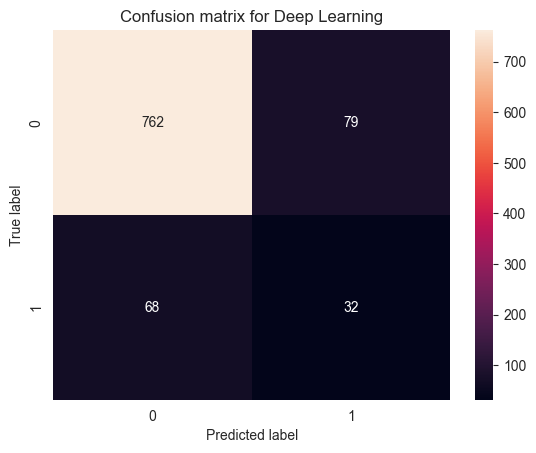

In [60]:
# Deep learning
model5 = Sequential(
    [
        Dense(128, activation="relu", input_shape=(x_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(64, activation="relu"),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation="relu"),
        BatchNormalization(),
        Dropout(0.2),
        Dense(16, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

model5.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['Recall'])
model5.fit(x_train, y_train, epochs=100, batch_size=32,validation_split=0.2, verbose=0)
y_pred5_prob = model5.predict(x_test)
y_pred5 = np.round(y_pred5_prob)
print('Deep Learning')
print('ROC AUC: ', roc_auc_score(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

# confusion matrix
cm = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for Deep Learning')
plt.show()


Early stopping occurred at epoch 140 with best_epoch = 90 and best_val_0_auc = 0.67793
TabNet
ROC AUC:  0.6295065398335314
              precision    recall  f1-score   support

           0       0.93      0.63      0.75       841
           1       0.17      0.63      0.27       100

    accuracy                           0.63       941
   macro avg       0.55      0.63      0.51       941
weighted avg       0.85      0.63      0.70       941


/Users/liamlupatin/Documents/הנדסה ביו רפואית/שנה ג׳/סמסטר ו׳/למידה חישובית/פרויקט/Final project/venv/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


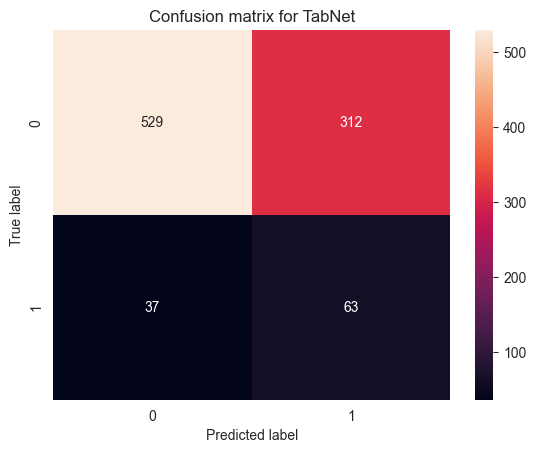

In [55]:
# TabNet
params = {'optimizer_params':dict(lr=0.001),
          'verbose':0}

# create validation set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

clf = TabNetClassifier(**params)
clf.fit(x_train, y_train,
        eval_set=[(x_val, y_val)],
        eval_metric=['auc'],max_epochs=500, patience=50)
y_pred6 = clf.predict(x_test)
print('TabNet')
print('ROC AUC: ', roc_auc_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

# confusion matrix
cm = confusion_matrix(y_test, y_pred6)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for TabNet')
plt.show()


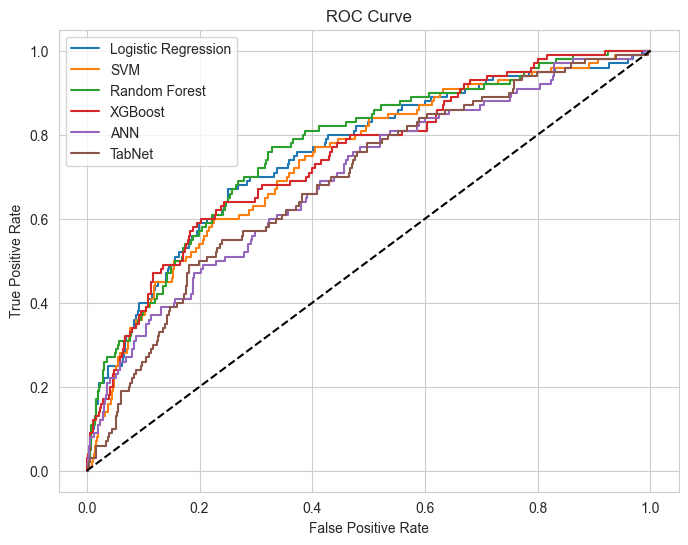

In [61]:
# plot ROC curve
# logistic regression
y_pred_prob1 = model1.predict_proba(x_test)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

# SVM
y_pred_prob2 = model2.decision_function(x_test)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

# random forest
y_pred_prob3 = model3.predict_proba(x_test)[:, 1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

# XGBoost
y_pred_prob4 = model4.predict_proba(x_test)[:, 1]
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

# deep learning
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred5_prob)

# tabnet
y_pred_prob6 = clf.predict_proba(x_test)[:, 1]
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)

# plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='SVM')
plt.plot(fpr3, tpr3, label='Random Forest')
plt.plot(fpr4, tpr4, label='XGBoost')
plt.plot(fpr5, tpr5, label='ANN')
plt.plot(fpr6, tpr6, label='TabNet')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [32]:

# Keras model builder function
def build_keras_model(input_shape):
    model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid"),
    ])
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=[Recall()])
    return model


df = pd.read_csv('data/combined.csv')
X = df.drop('depression', axis=1)
y = df['depression']

# normalize data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

params = {'optimizer_params':dict(lr=0.001), # For tabnet
          'verbose':0}

# Stratified 10-Fold cross-validator
skf = StratifiedKFold(n_splits=10)

# List of models to evaluate
models = [
    LogisticRegression(max_iter=1000),
    SVC(kernel='poly',degree=4,C=.1),
    RandomForestClassifier(n_estimators=1000, max_depth=5),
    xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000, max_depth=10),
    build_keras_model((X.shape[1],)),
    TabNetClassifier(**params)
]

# Dictionary to store recall scores for each model
recall_scores = {model_name: [] for model_name in ['Logistic', 'SVM', 'RandomForest', 'XGBoost', 'Keras', 'TabNet']}

# Iterate through each fold
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Oversample training data with SMOTE
    sm = SMOTE(random_state=42)
    X_train, y_train = sm.fit_resample(X_train, y_train)
    
    # Iterate through each model
    for model, model_name in zip(models, recall_scores.keys()):
        if model_name == 'Keras':
            model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
            recall = model.evaluate(X_test, y_test, verbose=0)[1]
        elif model_name == 'TabNet':
            model.fit(X_train, y_train,
                    eval_metric=['auc'],
                    max_epochs=100)
            y_pred = model.predict(X_test)
            recall = recall_score(y_test, y_pred)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            recall = recall_score(y_test, y_pred)
            
        recall_scores[model_name].append(recall)

for model_name, scores in recall_scores.items():
    print(f"{model_name}: {np.mean(scores)}")


/Users/liamlupatin/Documents/הנדסה ביו רפואית/שנה ג׳/סמסטר ו׳/למידה חישובית/פרויקט/Final project/venv/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/liamlupatin/Documents/הנדסה ביו רפואית/שנה ג׳/סמסטר ו׳/למידה חישובית/פרויקט/Final project/venv/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/liamlupatin/Documents/הנדסה ביו רפואית/שנה ג׳/סמסטר ו׳/למידה חישובית/פרויקט/Final project/venv/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/liamlupatin/Documents/הנדסה ביו רפואית/שנה ג׳/סמסטר ו׳/למידה חישובית/פרויקט/Final project/venv/lib/python3.10/site-packages/pytorch_tabnet/abstract_model

Logistic: 0.7179846938775512
SVM: 0.6272108843537415
RandomForest: 0.5320578231292517
XGBoost: 0.14906462585034014
Keras: 0.681887748837471
TabNet: 0.5483418367346939


In [43]:
# ANOVA
recall_scores_df = pd.read_csv('recall_scores.csv')
f_statistic, p_value_anova = f_oneway(*[recall_scores_df[model] for model in recall_scores_df.columns[0:]])

f_statistic, p_value_anova

(36.06236873253117, 4.778906980890085e-16)

In [45]:
# Paired t-test
def perform_paired_t_tests_all(data):
    columns = data.columns
    results = []
    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            model1 = columns[i]
            model2 = columns[j]
            t_statistic, p_value = ttest_rel(data[model1], data[model2])
            results.append((model1, model2, t_statistic, p_value))
    return results

# Performing paired t-tests including all models
paired_t_test_results_all = perform_paired_t_tests_all(recall_scores_df)

# Applying Bonferroni correction
alpha = 0.05 / len(paired_t_test_results_all)
bonferroni_results_all = [(model1, model2, t_statistic, p_value, p_value < alpha) for model1, model2, t_statistic, p_value in paired_t_test_results_all]

# Creating a DataFrame to display the results
paired_t_test_df_all = pd.DataFrame(bonferroni_results_all, columns=['Model 1', 'Model 2', 'T-Statistic', 'P-Value', 'Reject Null (Bonferroni)'])
paired_t_test_df_all


,Model 1,Model 2,T-Statistic,P-Value,Reject Null (Bonferroni)
0,Logistic,SVM,4.029238,2.976382e-03,True
1,Logistic,RandomForest,6.287997,1.430098e-04,True
2,Logistic,XGBoost,20.748884,6.563785e-09,True
3,Logistic,Keras,0.450747,6.628347e-01,False
4,Logistic,TabNet,6.853171,7.446832e-05,True
5,SVM,RandomForest,4.906752,8.397927e-04,True
6,SVM,XGBoost,23.432082,2.237090e-09,True
7,SVM,Keras,-0.736984,4.799026e-01,False
8,SVM,TabNet,2.977279,1.551796e-02,False
9,RandomForest,XGBoost,20.933521,6.069680e-09,True
